# COVID scaled deaths and cases visualization.
## Matplotlib graphs.
Simple script which makes use of data downloaded manually from EU's Open Data Portal (https://data.europa.eu/euodp/en/home) and performs some visualizations. Files are exported in high resolution. You can tweak to produce many types of graph or prepare a function which automatically grabs latest data! You can also create you own website presenting results.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
# FILE OPENING
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide.xlsx")

In [3]:
# GETTING DEATHS & CASES SCALED TO POPULATION
df["scaled_deaths"] = df["deaths"]/df["popData2018"]
df["scaled_cases"] = df["cases"]/df["popData2018"]
temp = pd.DataFrame(df)

In [4]:
# SELECTION OF TARGET COUNTRIES
target_countries = ["Greece", "Italy", "Germany", "China", "United_States_of_America", "United_Kingdom"]

In [5]:
# REMOVAL OF OLD DATA
df = df.sort_values(by=['dateRep'], ascending=True)
df = df.iloc[int(len(df)*0.35):-1]

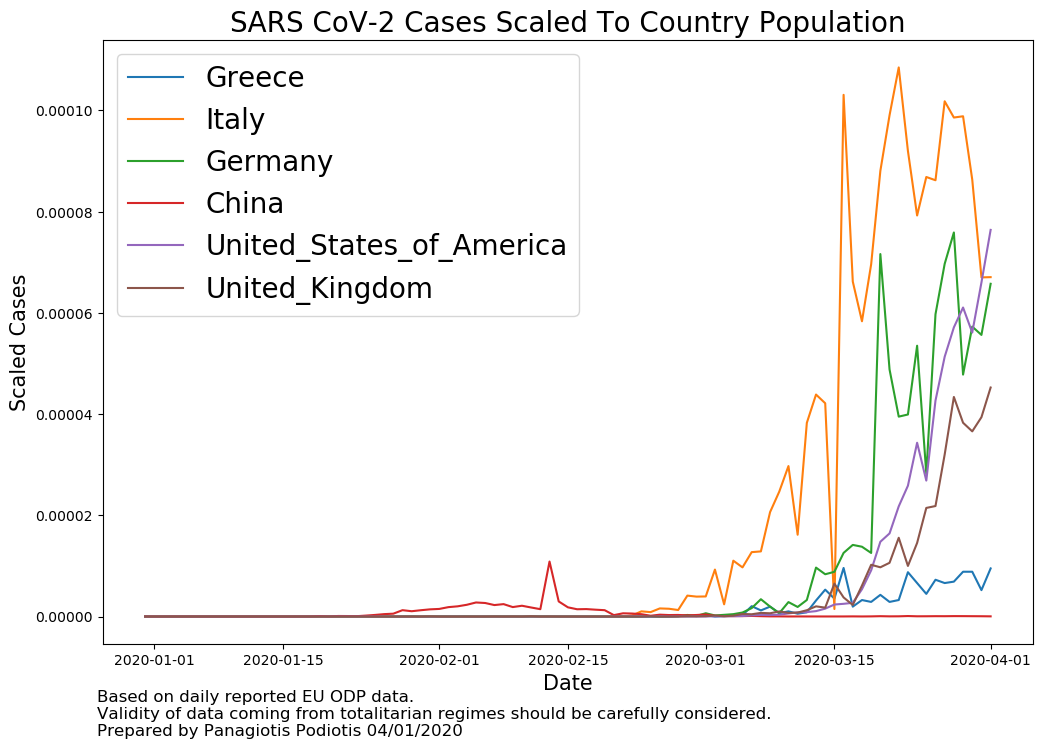

In [6]:
# PLOTTING of CASES
for i in temp.index.values:
    if temp.loc[i, "countriesAndTerritories"] not in target_countries:
        temp.drop(i, axis="rows", inplace=True)
x = temp.index.values.tolist()
y = temp["scaled_cases"].values.tolist()
for country in target_countries:
    x = temp.loc[temp["countriesAndTerritories"] == country, 'dateRep']
    y = temp.loc[temp["countriesAndTerritories"] == country, 'scaled_cases']
    plt.plot(x, y, label=country)
plt.title("SARS CoV-2 Cases Scaled To Country Population", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Scaled Cases", fontsize=15)
plt.legend(loc="upper left", fontsize=20, markerscale=1)
plt.gcf().text(0.12, 0.01, "Based on daily reported EU ODP data. \nValidity of data coming from totalitarian regimes should be carefully considered. \nPrepared by Panagiotis Podiotis 04/01/2020", fontsize=12)
plt.savefig('Scaled_Cases.pdf',format="pdf", optimize=True, dpi=1000)

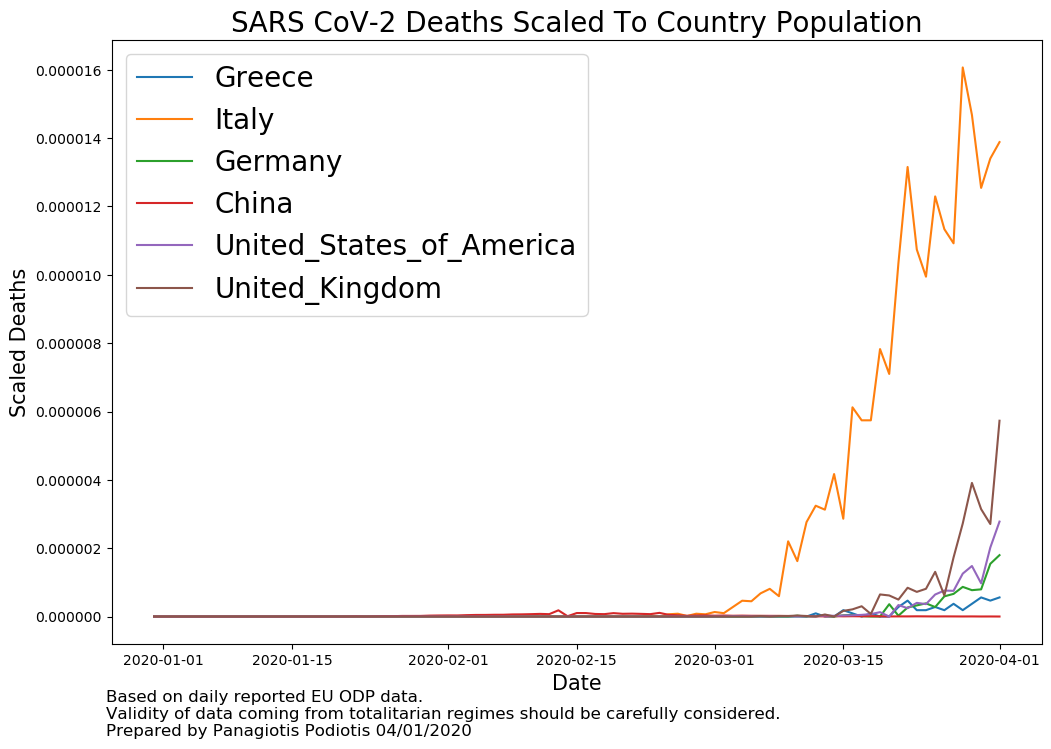

In [7]:
# PLOTTING of DEATHS
for i in temp.index.values:
    if temp.loc[i, "countriesAndTerritories"] not in target_countries:
        temp.drop(i, axis="rows", inplace=True)
x = temp.index.values.tolist()
y = temp["scaled_deaths"].values.tolist()
for country in target_countries:
    x = temp.loc[temp["countriesAndTerritories"] == country, 'dateRep']
    y = temp.loc[temp["countriesAndTerritories"] == country, 'scaled_deaths']
    plt.plot(x, y, label=country)
plt.title("SARS CoV-2 Deaths Scaled To Country Population", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Scaled Deaths", fontsize=15)
plt.legend(loc="upper left", fontsize=20, markerscale=1)
plt.gcf().text(0.12, 0.01, "Based on daily reported EU ODP data. \nValidity of data coming from totalitarian regimes should be carefully considered. \nPrepared by Panagiotis Podiotis 04/01/2020", fontsize=12)
plt.savefig('Scaled_Deaths.pdf',format="pdf", optimize=True, dpi=1000)